Importing the essential libraries

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading the dataset

In [78]:
data=pd.read_csv('/titanic_dataset .csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Pre-processing the data by dropping non essential columns and filling in the missing values

In [79]:
dt=data.copy()
dt.drop('PassengerId',axis=1,inplace=True)
dt

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [80]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [81]:
dt.Ticket.nunique()

681

In [82]:
dt.Age.skew()

0.38910778230082704

In [83]:
dt['Age']=dt.Age.fillna(dt.Age.mean())
dt.Age.isna().sum()

0

In [84]:
dt.Cabin.nunique()

147

In [85]:
dt.drop(['Cabin','Ticket'],axis=1,inplace=True)

In [86]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [87]:
dt['Embarked']=dt['Embarked'].fillna(dt['Embarked'].mode()[0])

In [88]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [89]:
dt

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,C


In [90]:
dt.Name.nunique()

891

### Encoding the dataset using Label Encoder

In [91]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [92]:
for i in dt[['Sex','Embarked']]:
    dt[i]=le.fit_transform(dt[i])
dt

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,7.2500,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,71.2833,0
2,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,7.9250,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,53.1000,2
4,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,13.0000,2
887,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,30.0000,2
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,23.4500,2
889,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,30.0000,0


In [93]:
dt.drop('Name',axis=1,inplace=True)

In [94]:
dt

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


### Checking the presence of outliers in the numerical columns and handling them using the clip method

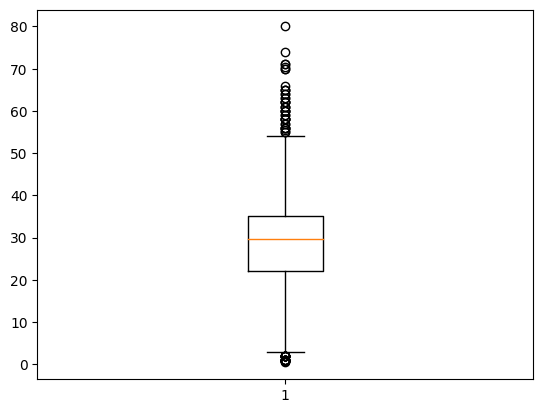

In [95]:
plt.boxplot(dt['Age']);

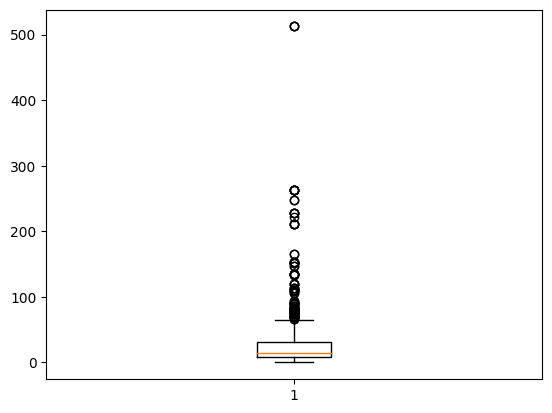

In [96]:
plt.boxplot(dt['Fare']);

In [97]:
Q1=np.percentile(dt['Age'],25,method='midpoint')
Q2=np.percentile(dt['Age'],50,method='midpoint')
Q3=np.percentile(dt['Age'],75,method='midpoint')

print('Q1 is ',Q1)
print('Q2 is ',Q2)
print('Q3 is ',Q3)

Q1 is  22.0
Q2 is  29.69911764705882
Q3 is  35.0


In [98]:
IQR=Q3-Q1
print('IQR is ',IQR)

IQR is  13.0


In [99]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

print('Lower limit is ',low_lim)
print('Upper limit is ',up_lim)

Lower limit is  2.5
Upper limit is  54.5


In [100]:
outliers=[]
for i in dt['Age']:
    if i < low_lim or i > up_lim:
        outliers.append(i)
print(outliers)

[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


In [101]:
dt['Age']=dt['Age'].clip(lower=low_lim,upper=up_lim)

In [102]:
outliers=[]
for i in dt['Age']:
    if i < low_lim or i > up_lim:
        outliers.append(i)

print(outliers)

[]


In [103]:
Q1=np.percentile(dt['Fare'],25,method='midpoint')
Q2=np.percentile(dt['Fare'],50,method='midpoint')
Q3=np.percentile(dt['Fare'],75,method='midpoint')

print('Q1 is ',Q1)
print('Q2 is ',Q2)
print('Q3 is ',Q3)

Q1 is  7.9104
Q2 is  14.4542
Q3 is  31.0


In [104]:
IQR=Q3-Q1
print('IQR is ',IQR)

IQR is  23.0896


In [105]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

print('Lower limit is ',low_lim)
print('Upper limit is ',up_lim)

Lower limit is  -26.724
Upper limit is  65.6344


In [106]:
outliers=[]
for i in dt['Fare']:
    if i < low_lim or i > up_lim:
        outliers.append(i)
print(outliers)

[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0, 83.1583, 69.55, 89.1042, 164.8667, 69.55, 83.1583]


In [107]:
dt['Fare']=dt['Fare'].clip(lower=low_lim,upper=up_lim)

In [108]:
outliers=[]
for i in dt['Fare']:
    if i < low_lim or i > up_lim:
        outliers.append(i)

print(outliers)

[]


In [109]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


# Refined dataset

In [110]:
dt

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,65.6344,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


### Labeling the target and independent variables

In [111]:
y=dt['Survived']
x=dt.drop('Survived',axis=1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.2)

# kNN Method

In [112]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)

In [113]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [114]:
for k in neighbors:
    classifiers=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    classifiers.fit(x_train,y_train)
    knn_pred=classifiers.predict(x_test)
    accuracy=accuracy_score(y_test,knn_pred)
    metric_k.append(accuracy)

Text(0, 0.5, 'Metric K')

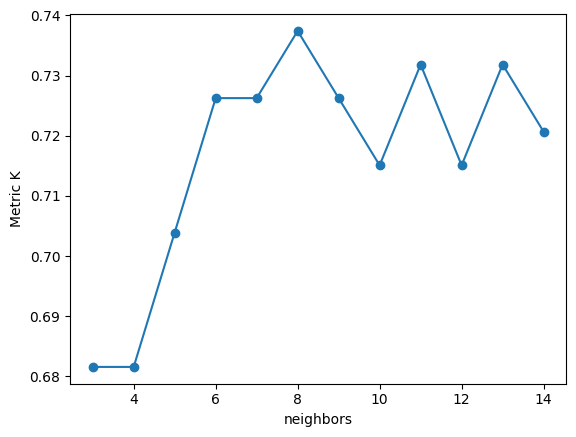

In [115]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('neighbors')
plt.ylabel('Metric K')

In [116]:
classifiers8=KNeighborsClassifier(n_neighbors=8,metric='minkowski',p=2)
classifiers8.fit(x_train,y_train)
knn_pred8=classifiers8.predict(x_test)
print(accuracy_score(y_test,knn_pred8))

0.7374301675977654


In [117]:
confusion_matrix(y_test,knn_pred)

array([[92, 13],
       [37, 37]])

In [118]:
print('Accuracy : ',accuracy_score(y_test,knn_pred))
print('Precision : ',precision_score(y_test,knn_pred))
print('Recall : ',recall_score(y_test,knn_pred))
print('F1 : ',f1_score(y_test,knn_pred))

Accuracy :  0.7206703910614525
Precision :  0.74
Recall :  0.5
F1 :  0.5967741935483871


## KFold cross validation of kNN method

In [119]:
from sklearn.model_selection import KFold
kfold_validator=KFold(10)

In [120]:
for train_index,test_index in kfold_validator.split(x,y):
    print('Training index: ',train_index)
    print('Testing index: ',test_index)

Training index:  [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 3

In [121]:
from sklearn.model_selection import cross_val_score
cv_result1=cross_val_score(classifiers8,x,y,cv=kfold_validator)

In [122]:
cv_result1

array([0.62222222, 0.69662921, 0.70786517, 0.71910112, 0.73033708,
       0.73033708, 0.74157303, 0.70786517, 0.75280899, 0.76404494])

In [123]:
cv_result1.mean()

0.717278401997503

## Stratified K-Fold cross validation of kNN method

In [124]:
from sklearn.model_selection import StratifiedKFold
strat_validator=StratifiedKFold(n_splits=10)

In [125]:
for train_index,test_index in strat_validator.split(x,y):
    print('Training index: ',train_index)
    print('Testing index: ',test_index)

Training index:  [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 3

In [126]:
skr_cv1=cross_val_score(classifiers8,x,y,cv=strat_validator)
skr_cv1

array([0.63333333, 0.66292135, 0.6741573 , 0.76404494, 0.75280899,
       0.70786517, 0.75280899, 0.73033708, 0.73033708, 0.74157303])

In [127]:
skr_cv1.mean()

0.7150187265917604

# SVC

In [128]:
from sklearn.svm import SVC
svc=SVC()

In [129]:
svc_model=svc.fit(x_train,y_train)
svc_pred=svc_model.predict(x_test)

In [130]:
print('Accuracy : ',accuracy_score(y_test,svc_pred))
print('Precision : ',precision_score(y_test,svc_pred))
print('Recall : ',recall_score(y_test,svc_pred))
print('F1 : ',f1_score(y_test,svc_pred))

Accuracy :  0.6703910614525139
Precision :  0.7419354838709677
Recall :  0.3108108108108108
F1 :  0.4380952380952381


## K-Fold cross validation of SVC method

In [131]:
cv_result2=cross_val_score(svc_model,x,y,cv=kfold_validator)

In [132]:
cv_result2

array([0.54444444, 0.66292135, 0.66292135, 0.69662921, 0.64044944,
       0.69662921, 0.68539326, 0.74157303, 0.76404494, 0.71910112])

In [133]:
cv_result2.mean()

0.6814107365792759

## Stratified K-Fold cross validation of SVC method

In [134]:
skr_cv2=cross_val_score(svc_model,x,y,cv=strat_validator)
skr_cv2

array([0.56666667, 0.59550562, 0.69662921, 0.76404494, 0.6741573 ,
       0.68539326, 0.73033708, 0.75280899, 0.74157303, 0.68539326])

In [135]:
skr_cv2.mean()

0.6892509363295881

In [136]:
svc_lin=SVC(kernel='linear')

In [137]:
svc_linmodel=svc_lin.fit(x_train,y_train)
svc_linpred=svc_linmodel.predict(x_test)

In [138]:
print('Accuracy : ',accuracy_score(y_test,svc_linpred))
print('Precision : ',precision_score(y_test,svc_linpred))
print('Recall : ',recall_score(y_test,svc_linpred))
print('F1 : ',f1_score(y_test,svc_linpred))

Accuracy :  0.7821229050279329
Precision :  0.7536231884057971
Recall :  0.7027027027027027
F1 :  0.7272727272727273


## K-Fold cross validation of SVC method with kernel as linear

In [139]:
cv_result3=cross_val_score(svc_linmodel,x,y,cv=kfold_validator)
cv_result3

array([0.81111111, 0.82022472, 0.75280899, 0.84269663, 0.76404494,
       0.79775281, 0.74157303, 0.73033708, 0.84269663, 0.76404494])

In [140]:
cv_result3.mean()

0.786729088639201

## Stratified K-Fold cross validation of SVC method with kernel as linear

In [141]:
skr_cv3=cross_val_score(svc_linmodel,x,y,cv=strat_validator)
skr_cv3

array([0.81111111, 0.79775281, 0.76404494, 0.84269663, 0.79775281,
       0.7752809 , 0.76404494, 0.74157303, 0.80898876, 0.76404494])

In [142]:
skr_cv3.mean()

0.786729088639201

In [144]:
svc_poly=SVC(kernel='poly')

In [145]:
svc_polymodel=svc_poly.fit(x_train,y_train)
svc_polypred=svc_polymodel.predict(x_test)

In [146]:
print('Accuracy : ',accuracy_score(y_test,svc_polypred))
print('Precision : ',precision_score(y_test,svc_polypred))
print('Recall : ',recall_score(y_test,svc_polypred))
print('F1 : ',f1_score(y_test,svc_polypred))

Accuracy :  0.659217877094972
Precision :  0.76
Recall :  0.25675675675675674
F1 :  0.3838383838383838


## K-Fold cross validation of SVC method with kernel as poly

In [147]:
cv_result4=cross_val_score(svc_polymodel,x,y,cv=kfold_validator)
cv_result4

array([0.58888889, 0.71910112, 0.68539326, 0.68539326, 0.65168539,
       0.69662921, 0.65168539, 0.69662921, 0.74157303, 0.71910112])

In [148]:
cv_result4.mean()

0.6836079900124844

## Stratified K-Fold cross validation of SVC method with kernel as poly

In [149]:
skr_cv4=cross_val_score(svc_polymodel,x,y,cv=strat_validator)
skr_cv4

array([0.61111111, 0.60674157, 0.71910112, 0.75280899, 0.68539326,
       0.68539326, 0.68539326, 0.68539326, 0.71910112, 0.69662921])

In [150]:
skr_cv4.mean()

0.6847066167290887

# Across all the models, we can see that the SVC model with the kernel as linear, has the highest accuracy score and cross validation scores among the rest